In [19]:
#import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
import os
import sys
import matplotlib.pyplot as plt

In [2]:
gpu_options = tf.compat.v1.GPUOptions(visible_device_list="0", allow_growth=True)
config = tf.compat.v1.ConfigProto(gpu_options = gpu_options)
tf.compat.v1.enable_eager_execution(config=config)

In [3]:
from model import deeplab_v3plus
#from image_utils import *
from data_gen import make_data_gen

In [4]:
import importlib
importlib.reload(sys.modules['image_utils'])
from model import deeplab_v3plus

In [5]:
n_categories = 21
image_size = (512,512)

In [6]:
%time
model = deeplab_v3plus(image_size,n_categories)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.15 µs


In [7]:
#model.summary(line_length=200)

In [8]:
seg_img_dir = "../pascal_voc_2012_datasets/VOCdevkit/VOC2012/SegmentationClass"
img_dir = "../pascal_voc_2012_datasets/VOCdevkit/VOC2012/JPEGImages"
train_set_path = "../pascal_voc_2012_datasets/VOCdevkit/VOC2012/ImageSets/Segmentation/train.txt"
valid_set_path = "../pascal_voc_2012_datasets/VOCdevkit/VOC2012/ImageSets/Segmentation/trainval.txt"
test_set_path = "../pascal_voc_2012_datasets/VOCdevkit/VOC2012/ImageSets/Segmentation/val.txt"

with open(train_set_path) as f:
    train_img_names = f.read().split("\n")[:-1]
with open(valid_set_path) as f:
    valid_img_names = f.read().split("\n")[:-1]
with open(test_set_path) as f:
    test_img_names = f.read().split("\n")[:-1]

In [9]:
img_paths = [os.path.join(img_dir,train_img_names[i]) + ".jpg" for i in range(len(train_img_names))]
seg_img_paths = [os.path.join(seg_img_dir,train_img_names[i]) + ".png" for i in range(len(train_img_names))]

In [14]:
loss_function = tf.keras.losses.categorical_crossentropy
opt = tf.keras.optimizers.Adam()
batch_size=8
n_epochs=25
n_batch = len(img_paths)//batch_size

In [15]:
data_gen = make_data_gen(img_paths, seg_img_paths, image_size, batch_size, n_categories)

In [16]:
model.compile(optimizer=opt, loss=loss_function)

In [17]:
hist = model.fit_generator(data_gen, epochs=n_epochs, steps_per_epoch=n_batch)

Epoch 1/25
183/183 [==============================] - 208s 1s/step - loss: 2.6497
Epoch 2/25
183/183 [==============================] - 206s 1s/step - loss: 2.3697
Epoch 3/25
183/183 [==============================] - 206s 1s/step - loss: 2.1342
Epoch 4/25
183/183 [==============================] - 206s 1s/step - loss: 1.9404
Epoch 5/25
183/183 [==============================] - 207s 1s/step - loss: 1.7539
Epoch 6/25
183/183 [==============================] - 205s 1s/step - loss: 1.5973
Epoch 7/25
183/183 [==============================] - 206s 1s/step - loss: 1.4720
Epoch 8/25
183/183 [==============================] - 206s 1s/step - loss: 1.3573
Epoch 9/25
183/183 [==============================] - 207s 1s/step - loss: 1.2630
Epoch 10/25
183/183 [==============================] - 207s 1s/step - loss: 1.1803
Epoch 11/25
183/183 [==============================] - 208s 1s/step - loss: 1.1044
Epoch 12/25
183/183 [==============================] - 207s 1s/step - loss: 1.0468
Epoch 13/25
1

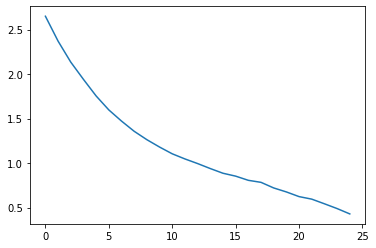

In [20]:
plt.plot(hist.history['loss'])

In [60]:
import PIL.Image as Image
import numpy as np
from image_utils import *
sample_image = Image.open(seg_img_paths[0])
palette = sample_image.getpalette()
palette = np.array(palette).reshape(-1, 3)/255


In [61]:
x = make_x_from_image_paths(img_paths[0:5], image_size)
y = make_y_from_image_paths(seg_img_paths[0:5], image_size, n_categories)

In [62]:
pred = model.predict(x)

In [71]:
pred_image = []
for i in range(pred.shape[0]):
    out_img0 = np.zeros((*image_size, 3), np.float32)
    max_category = pred[i,:,:,:].argmax(2)
    for j in range(n_categories):
        out_img0[max_category==j] = palette[j,:]
    pred_image.append(out_img0)


In [72]:
y_image = []
for i in range(pred.shape[0]):
    out_img0 = np.zeros((*image_size, 3), np.float32)
    max_category = y[i,:,:,:].argmax(2)
    for j in range(n_categories):
        out_img0[max_category==j] = palette[j,:]
    y_image.append(out_img0)


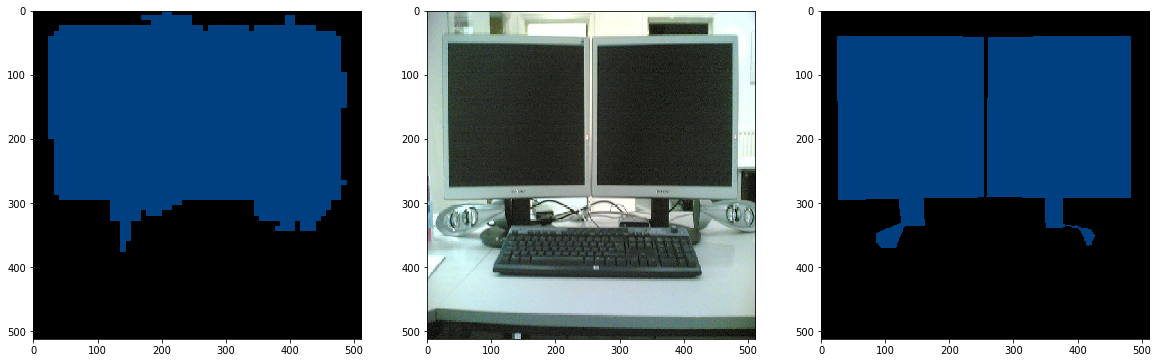

In [84]:
i=4
plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
plt.imshow(pred_image[i])
plt.subplot(1,3,2)
plt.imshow(x[i,:,:,:])
plt.subplot(1,3,3)
plt.imshow(y_image[i])

In [54]:
max_category.shape

(512, 21)

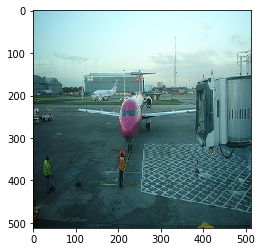

In [59]:
plt.imshow(x[0,:,:,:])